## This project is aimed to predict the Kic and CTOD of concretes

### The variables of the dataset are
* W(m): Depth of the beam
* S(m): Span length 
* B(m): Breadth of the beam
* E(GPa): Young Modulus
* f'c(MPa): Compressive strength
* a0(m): Notch depth
* ac(m): Final crack length
* ?c:  
* ?: 
* F(?c): 
* V(?c): 
* N(?c,?): 
* Pmax(N)Avg: Peak Load Average
* KsIC(MPa): stress intensity Factor
* CTODC(mm): Crack tip opening Displacement



In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



In [79]:
%matplotlib inline

df= pd.read_csv("model data1.csv")

df.head(10)


,W(m),S(m),B(m),E(GPa),f'c(MPa),a0(m),ac(m),?c,?,F(?c),V(?c),"N(?c, ?)",Pmax (N)Avg,KsIC (MPa),CTODC(mm)
0,0.08,0.2,0.05,35.5,67.5,0.0021,0.0026,0.0325,0.7908,1.0723,1.3950,0.4652,7350.0,0.6678,0.0013
1,0.08,0.2,0.05,35.5,67.5,0.0021,0.0028,0.0345,0.7460,1.0697,1.3939,0.5117,7350.0,0.6859,0.0015
2,0.08,0.2,0.05,35.5,67.5,0.0021,0.0029,0.0364,0.7060,1.0672,1.3928,0.5496,7350.0,0.7034,0.0017
3,0.08,0.2,0.05,35.5,67.5,0.0021,0.0031,0.0384,0.6701,1.0647,1.3918,0.5814,7350.0,0.7203,0.0019
4,0.08,0.2,0.05,35.5,67.5,0.0021,0.0032,0.0403,0.6377,1.0623,1.3909,0.6085,7350.0,0.7366,0.0021
5,0.08,0.2,0.05,35.5,67.5,0.0021,0.0034,0.0423,0.6083,1.0598,1.3899,0.6320,7350.0,0.7525,0.0023
6,0.08,0.2,0.05,35.5,67.5,0.0021,0.0035,0.0442,0.5814,1.0575,1.3891,0.6526,7350.0,0.7680,0.0025
7,0.08,0.2,0.05,35.5,67.5,0.0021,0.0037,0.0462,0.5569,1.0552,1.3882,0.6708,7350.0,0.7830,0.0027
8,0.08,0.2,0.05,35.5,67.5,0.0021,0.0038,0.0481,0.5343,1.0529,1.3874,0.6871,7350.0,0.7977,0.0028
9,0.08,0.2,0.05,35.5,67.5,0.0021,0.0040,0.0501,0.5135,1.0507,1.3867,0.7017,7350.0,0.8120,0.0030


In [3]:
df.shape

(312, 15)

In [80]:
# remove variables not needed because some have missing values
column_to_drop = ['W(m)','S(m)', 'B(m)','?c','?','F(?c)','V(?c)', 'N(?c, ?)']

df.drop(column_to_drop , axis=1, inplace=True)


df.shape

(312, 7)

In [5]:
df.describe()

,E(GPa),f'c(MPa),a0(m),ac(m),Pmax (N)Avg,KsIC (MPa),CTODC(mm)
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,37.930849,69.782468,0.008546,0.034202,5726.862091,2.048863,0.048600
std,5.103831,17.883681,0.008947,0.017344,3724.521522,3.095156,0.098225
min,27.800000,42.200000,0.002100,0.002600,583.216700,0.009000,0.001100
25%,35.500000,65.100000,0.004100,0.020850,1880.171900,0.698300,0.009075
50%,35.500000,67.500000,0.005000,0.035100,7350.000000,0.960050,0.015800
75%,42.987000,67.500000,0.008400,0.048150,7350.000000,1.235925,0.029775
max,45.200000,122.520000,0.060000,0.068300,19490.000000,13.984000,0.581000


Check for outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x1fffd69c580>,
 'caps': [<matplotlib.lines.Line2D at 0x1fffd69cb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fffd69c2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fffd69d0c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fffd69d390>],
 'means': []}

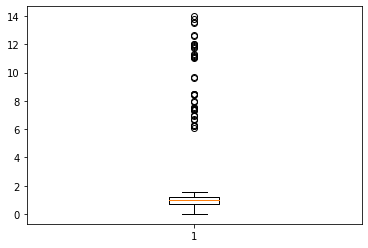

In [6]:
plt.boxplot(df['KsIC (MPa)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffff76be50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffff798430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffff76bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffff7989d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffff798ca0>],
 'means': []}

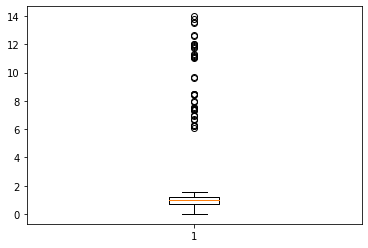

In [7]:
plt.boxplot(df['KsIC (MPa)'])


In [51]:
df = df[df['KsIC (MPa)'] <= 4]

### Explanatory Descriptive Analysis

In [81]:
df['final_crack'] = (df['ac(m)']-df['a0(m)'])
df.drop(['a0(m)', 'ac(m)'], axis= 1, inplace= True)



df.sample(10)


,E(GPa),f'c(MPa),Pmax (N)Avg,KsIC (MPa),CTODC(mm),final_crack
161,45.20,65.10,1839.4219,0.5181,0.0097,0.0391
105,35.50,67.50,7350.0000,1.3490,0.0280,0.0417
233,27.80,42.20,583.2167,0.3983,0.0038,0.0056
226,27.80,42.20,583.2167,0.3157,0.0012,0.0011
56,35.50,67.50,7350.0000,0.8734,0.0100,0.0166
25,35.50,67.50,7350.0000,0.4595,0.0011,0.0008
152,45.20,65.10,1839.4219,0.4761,0.0082,0.0362
265,35.78,57.14,6990.0000,1.4560,0.0980,0.0024
230,27.80,42.20,583.2167,0.3598,0.0027,0.0037
216,45.20,65.10,1894.4219,0.9850,0.0290,0.0572


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KsIC (MPa)', ylabel='Density'>

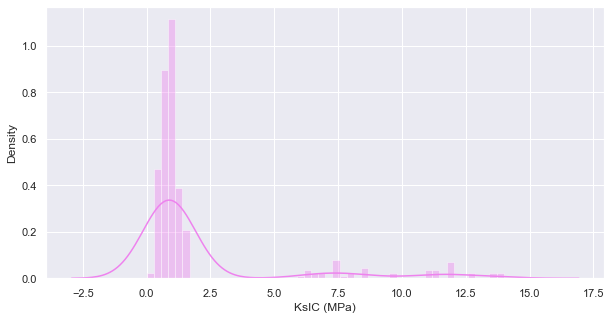

In [9]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df['KsIC (MPa)'], color = 'violet')


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTODC(mm)', ylabel='Density'>

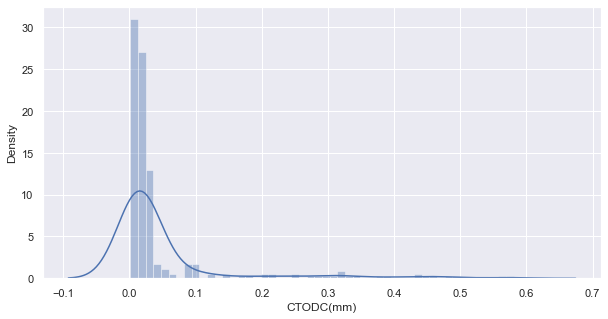

In [10]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df['CTODC(mm)'])

c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final_crack', ylabel='Density'>

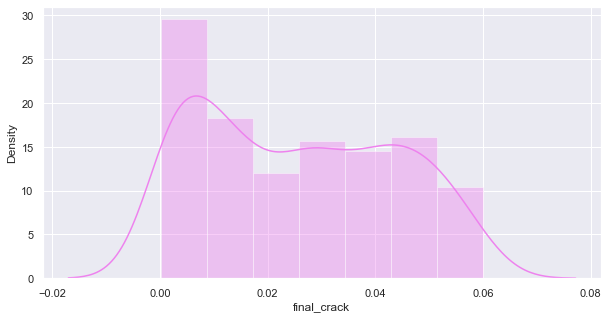

In [11]:
sns.set(font_scale=1.0)

fig = plt.subplots(figsize=(10, 5))

sns.distplot(df['final_crack'], color= 'violet')

In [12]:
df_2 =df
# df_3 = df.copy()

In [13]:
compare_value = pd.DataFrame(df_2[['KsIC (MPa)', 'CTODC(mm)']].groupby(
    by=df_2['f\'c(MPa)']).mean())
compare_value

,KsIC (MPa),CTODC(mm)
f'c(MPa),,
42.20,0.503704,0.007204
57.14,1.076716,0.041500
65.10,0.730065,0.018157
67.50,1.006791,0.014659
87.71,7.171118,0.227559
122.52,11.089160,0.270176


<AxesSubplot:xlabel="f'c(MPa)">

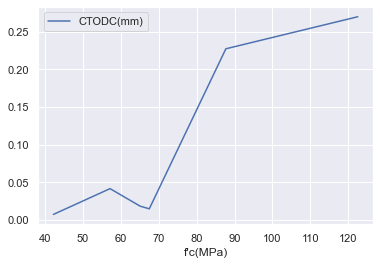

In [14]:
compare_value.drop('KsIC (MPa)', axis=1).plot()


<AxesSubplot:xlabel="f'c(MPa)">

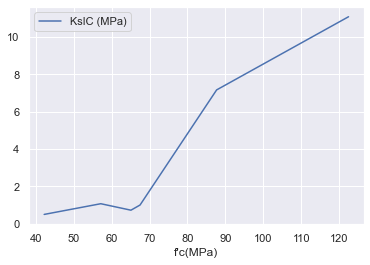

In [15]:
compare_value.drop('CTODC(mm)', axis=1).plot()


In [16]:
compare_value = pd.DataFrame(
    df[['KsIC (MPa)', 'CTODC(mm)']].groupby(by=df['Pmax (N)Avg']).mean())
compare_value.sort_index(ascending=False).head(15)
# we have 64 distinct peak loads

,KsIC (MPa),CTODC(mm)
Pmax (N)Avg,,
19490.0000,13.984000,0.581000
19310.0000,13.801000,0.563000
14230.0000,13.541000,0.483000
13980.0000,13.582000,0.490000
13510.0000,12.000000,0.301000
13370.0000,12.013000,0.306900
12516.6667,0.995158,0.014765
10850.0000,11.949000,0.389800
10620.0000,11.892000,0.383000


In [17]:
compare_value.head(10)

,KsIC (MPa),CTODC(mm)
Pmax (N)Avg,,
583.2167,0.503704,0.007204
1140.0000,0.091600,0.008100
1420.0000,0.009000,0.008000
1839.4219,0.496700,0.008930
1840.0000,1.083000,0.017800
1840.4219,0.523300,0.009900
1841.4219,0.528700,0.010000
1842.4219,0.534100,0.010200
1843.4219,0.539600,0.010400


<AxesSubplot:xlabel='Pmax (N)Avg'>

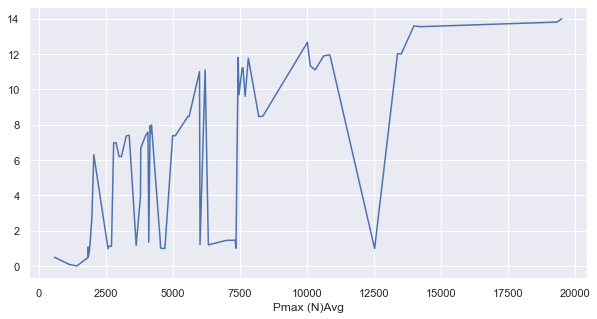

In [18]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

compare_value['KsIC (MPa)'].plot()

<AxesSubplot:xlabel='Pmax (N)Avg'>

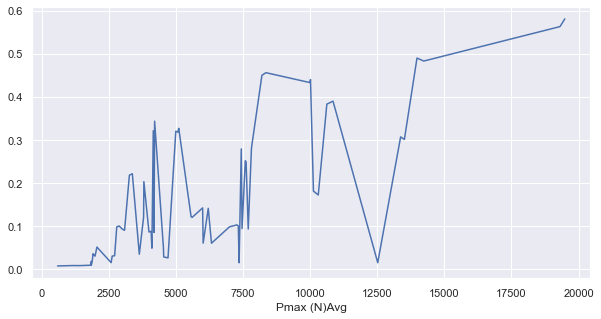

In [19]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

compare_value['CTODC(mm)'].plot()


In [20]:
compare_value = pd.DataFrame(
    df[['KsIC (MPa)', 'CTODC(mm)']].groupby(by=df['E(GPa)']).mean())
compare_value.sort_index(ascending=False).head(15)

,KsIC (MPa),CTODC(mm)
E(GPa),,
45.200,0.730065,0.018157
42.987,11.089160,0.270176
37.890,7.171118,0.227559
35.780,1.076716,0.041500
35.500,1.006791,0.014659
27.800,0.503704,0.007204


<AxesSubplot:xlabel='E(GPa)'>

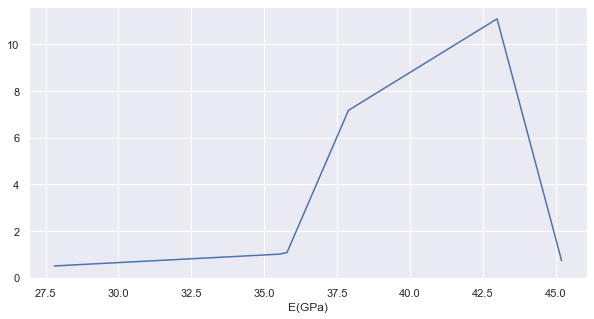

In [21]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))


compare_value['KsIC (MPa)'].plot()


<AxesSubplot:xlabel='E(GPa)'>

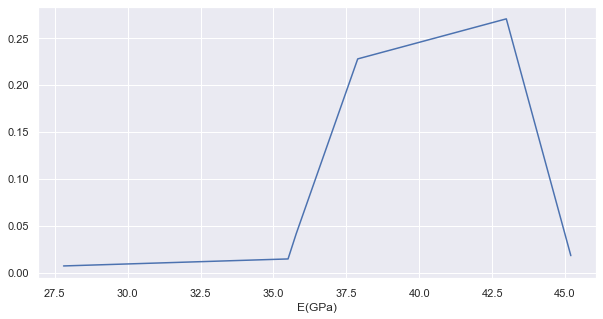

In [22]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))


compare_value['CTODC(mm)'].plot()


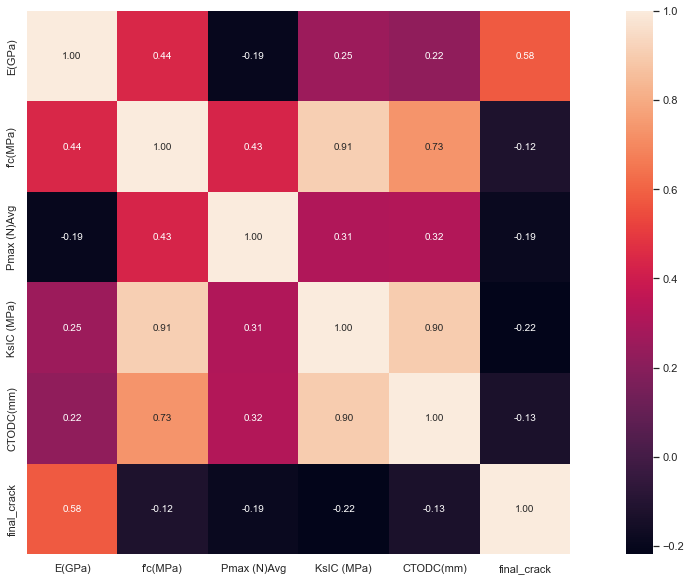

In [82]:
df_corr = df.corr()

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(20, 10))

hm_movies = sns.heatmap(df_corr, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={
                        "size": 10, }, yticklabels=df_corr.index, xticklabels=df_corr.index)


In [24]:
for col_name in ['KsIC (MPa)', 'CTODC(mm)']:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


KsIC (MPa):
 - Range: 13.97
 - Variance: 9.58
 - Std.Dev: 3.10

CTODC(mm):
 - Range: 0.58
 - Variance: 0.01
 - Std.Dev: 0.10


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures


In [84]:
y = df[['CTODC(mm)', 'KsIC (MPa)']].values
X = df.drop(['CTODC(mm)', 'KsIC (MPa)'], axis="columns")
XX = df.drop(['CTODC(mm)', 'KsIC (MPa)'], axis="columns")

In [85]:
#Normalize data and save as pickle
Polynomial = PolynomialFeatures(2, interaction_only=True)
X = Polynomial.fit_transform(X)



ScalerY = RobustScaler().fit(y)
pickle.dump(ScalerY, open('scalery.pkl', 'wb'))

Scaler = RobustScaler().fit(X)
pickle.dump(Scaler, open('scalerX.pkl', 'wb'))


In [86]:
column = Polynomial.get_feature_names_out()
column

array(['1', 'E(GPa)', "f'c(MPa)", 'Pmax (N)Avg', 'final_crack',
       "E(GPa) f'c(MPa)", 'E(GPa) Pmax (N)Avg', 'E(GPa) final_crack',
       "f'c(MPa) Pmax (N)Avg", "f'c(MPa) final_crack",
       'Pmax (N)Avg final_crack'], dtype=object)

In [87]:
#Apply tranformation 

X = Scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)


Train set: (249, 11) (249, 2)
Test set: (63, 11) (63, 2)


In [88]:
def get_weights_df(model, feat, col_name, col_name_2):
    #this function returns the weight of every feature
    weights_ctod = pd.Series(
        model.coef_[0], feat).sort_values()
    weights_ctod = pd.DataFrame(weights_ctod).reset_index()
    weights_ctod.columns = ['Features', col_name]
    weights_ctod[col_name].round(3)

    weights_kisc = pd.Series(
        model.coef_[1], feat).sort_values()
    weights_kisc_df = pd.DataFrame(weights_kisc).reset_index()
    weights_kisc_df.columns = ['Features', col_name_2]
    weights_kisc_df[col_name_2].round(3)

    weights_df = weights_ctod.merge(
        weights_kisc_df, how='inner', on="Features")
    return weights_df


In [89]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [90]:
from sklearn.metrics import r2_score, mean_squared_error
yhat = Lr.predict(X_test)
r2 = r2_score(y_test, yhat),
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)

print('the R-squared: %.3f' % r2)
print('the mean square error: %.3f' % mse)
print('the root mean square error: %.3f' % rmse)


the R-squared: 0.852
the mean square error: 0.205
the root mean square error: 0.452


In [91]:
from math import log


def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic


num_params = len(Lr.coef_[0]) + 1
print('Number of parameters: %d' % (num_params))

aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 12
AIC: -471.153


In [92]:
linear_reg_weights = get_weights_df(Lr, column, 'linear_reg_Weight_ctod','linear_reg_Weight_kics' )
linear_reg_weights

,Features,linear_reg_Weight_ctod,linear_reg_Weight_kics
0,Pmax (N)Avg,-3.397678,-67.327838
1,f'c(MPa) Pmax (N)Avg,-0.669507,-15.994099
2,E(GPa) f'c(MPa),-0.615072,-8.350571
3,final_crack,-0.336087,-8.097447
4,f'c(MPa) final_crack,-0.261600,-3.541733
5,1,0.000000,0.000000
6,Pmax (N)Avg final_crack,0.089280,2.097477
7,E(GPa),0.106581,-1.545047
8,f'c(MPa),0.128716,2.151581
9,E(GPa) final_crack,0.583197,11.090585


In [93]:
filename = 'first_model.pkl'
pickle.dump(Lr,open(filename, 'wb'))

In [94]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

In [95]:
# rigde regression help to reduce overfiting and minimize our errors by adding a penalty terms
# min(sum of squared errors + alpha * slope^2)
# the model becomes less sensitive to the variation of the factors


rscore = []

for alpha in range(1000):
    ridge_reg = Ridge(alpha = alpha )
    ridge_reg.fit(X_train,y_train)
    yhat = ridge_reg.predict(X_test)
    rscore_=r2_score(y_test,yhat)
    rscore.append(rscore_)
rscore= np.array(rscore)



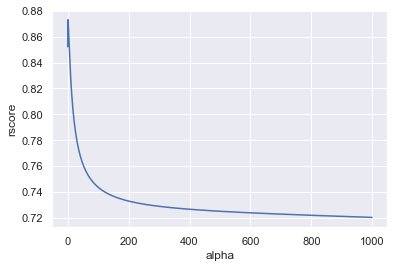

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(rscore)
plt.xlabel('alpha')
plt.ylabel('rscore')
plt.show()
plt.clf()

In [96]:
ridge_reg = Ridge(alpha= rscore.argmax())
ridge_reg.fit(X_train,y_train)
yhat= ridge_reg.predict(X_test)
r2 = r2_score(y_test,yhat)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)

print('the R-squared: %.3f' % r2)
print('the mean square error: %.3f' % mse)
print('the root mean square error: %.3f' % rmse)

the R-squared: 0.873
the mean square error: 0.213
the root mean square error: 0.461


In [97]:
ridge_reg_weights = get_weights_df(
    ridge_reg, column, 'ridge_reg_Weight_ctod', 'ridge_reg_Weight_kisc')
ridge_reg_weights


,Features,ridge_reg_Weight_ctod,ridge_reg_Weight_kisc
0,Pmax (N)Avg,-0.152388,-3.077661
1,E(GPa) f'c(MPa),-0.104677,-0.543021
2,E(GPa) Pmax (N)Avg,-0.050886,-1.202151
3,final_crack,-0.047741,-1.119517
4,Pmax (N)Avg final_crack,-0.015237,0.304648
5,1,0.000000,0.000000
6,E(GPa) final_crack,0.007489,0.035612
7,f'c(MPa),0.022536,0.424592
8,E(GPa),0.051155,-0.649255
9,f'c(MPa) final_crack,0.067947,1.032182


In [98]:
# from math import log
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic


num_params = len(ridge_reg.coef_[0]) + 1
print('Number of parameters: %d' % (num_params))


aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 12
AIC: -459.021


In [99]:
filename = 'final_model.pkl'
pickle.dump(ridge_reg,open(filename, 'wb'))

In [100]:
# lasso regression help to reduce overfiting and minimize our errors by adding a penalty terms
# min(sum of squared errors + alpha * |slope|)
# the model becomes less sensitive to the variation of the factors
# used for feature selection as the reduce useless variable to zero

from sklearn.linear_model import Lasso

rscore = []

for alpha in range(5000):
    lasso_reg = Ridge(alpha = alpha )
    lasso_reg.fit(X_train, y_train)
    yhat = lasso_reg.predict(X_test)
    rscore_=r2_score(y_test,yhat)
    rscore.append(rscore_)
rscore= np.array(rscore)

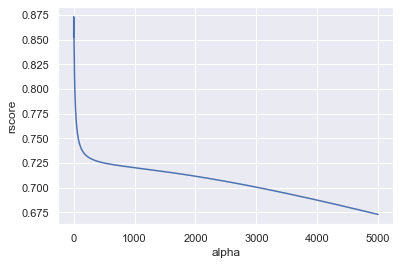

<Figure size 432x288 with 0 Axes>

In [101]:
plt.plot(rscore)
plt.xlabel('alpha')
plt.ylabel('rscore')
plt.show()
plt.clf()


In [102]:
lasso_reg = Ridge(alpha= rscore.argmax())
lasso_reg.fit(X_train,y_train)
yhat= lasso_reg.predict(X_test)
r2 = r2_score(y_test,yhat),
mse =mean_squared_error(y_test,yhat)
rmse = np.sqrt(mse)

print('the R-squared: %.3f' % r2)
print('the mean square error: %.3f' % mse)
print('the root mean square error: %.3f' % rmse)


the R-squared: 0.873
the mean square error: 0.213
the root mean square error: 0.461


In [103]:
lasso_reg_weights = get_weights_df(
    lasso_reg, column, 'lasso_reg_Weight_ctod', 'lasso_reg_Weight_kisc')
lasso_reg_weights


,Features,lasso_reg_Weight_ctod,lasso_reg_Weight_kisc
0,Pmax (N)Avg,-0.152388,-3.077661
1,E(GPa) f'c(MPa),-0.104677,-0.543021
2,E(GPa) Pmax (N)Avg,-0.050886,-1.202151
3,final_crack,-0.047741,-1.119517
4,Pmax (N)Avg final_crack,-0.015237,0.304648
5,1,0.000000,0.000000
6,E(GPa) final_crack,0.007489,0.035612
7,f'c(MPa),0.022536,0.424592
8,E(GPa),0.051155,-0.649255
9,f'c(MPa) final_crack,0.067947,1.032182


In [104]:
# from math import log
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic


num_params = len(lasso_reg.coef_[0]) + 1
print('Number of parameters: %d' % (num_params))

aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 12
AIC: -459.021
